## Week 2 Lesson

**Learning objectives**   
1. Be able to use google forms to create a survey  
2. Be able to write a short python code to read the survey results and present in a table format  
3. Be able to write a python code to analyze the table results displaying statistics on each numerical question (mean, median, std, 95% conf interval, t-test comparing column results)  
4. Be able to write a python code to visually represent the data as a barchart, pie chart, scatter plot with error bars, etc.    

### Below are some simple steps in creating your own poll using Google forms

Open a Google form from your browser:

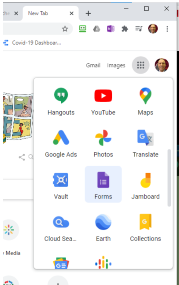

Let's take a look at the data collected from the short survey I sent out to you all.  docs.google.com/forms

From the menu in your form select download responses: 

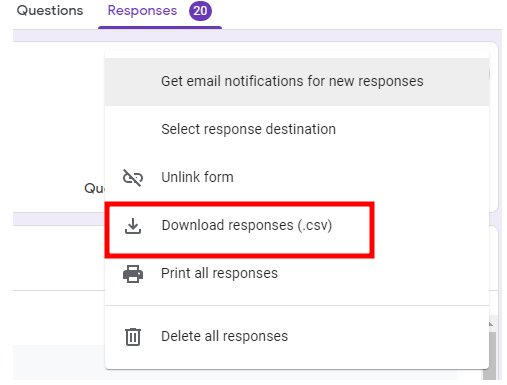

**Then we need to extract the zip file that was downloaded:**

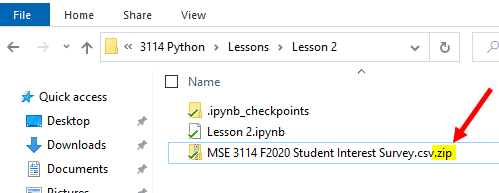

**Extracting the zip file creates the folder "MSE 3114 F2020 Student Interest Survey.csv"  Yes this is a folder.  **

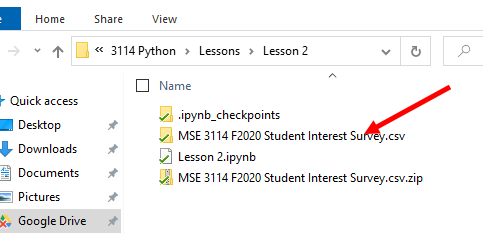

**rename folder to "data"** - I just don't like the long name

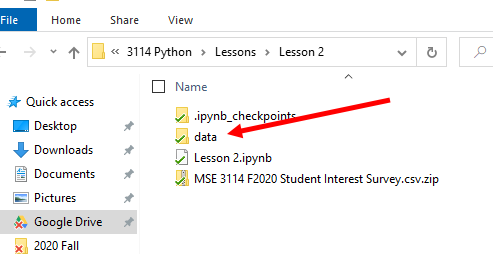

#### Now we are ready to import and analyze the data

In [1]:
import os  #we use this to join our file path to our filename
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [8]:
## you can include the filename in the path and just read path but I wanted to show you how to join a path to a filename if they were separate
## for example you might want to do this if you were importing multiple files and you had a list of filenames
path = r'C:\Users\Sean\Google Drive\Teaching\2114 & 3114 Math I & II\git_2114_3114\lessons_3114\Week 2 Lesson 2\data'
filename='MSE 3114 F21.csv'
fullpath=os.path.join(path,filename)

raw=pd.read_csv(fullpath)
raw.head()  #shows first 5 rows

,Timestamp,Total score,"If I have to choose between Pepsi and Coke, I prefer to drink Pepsi.","If I have to choose between Pepsi and Coke, I prefer to drink Pepsi. [Score]","If I have to choose between Pepsi and Coke, I prefer to drink Pepsi. [Feedback]","If I have to choose between Sweet Tea and Unsweet Tea, I prefer to drink Sweet Tea.","If I have to choose between Sweet Tea and Unsweet Tea, I prefer to drink Sweet Tea. [Score]","If I have to choose between Sweet Tea and Unsweet Tea, I prefer to drink Sweet Tea. [Feedback]","If I have to choose between Water and Vanilla flavored Almond Milk, I prefer to drink Water.","If I have to choose between Water and Vanilla flavored Almond Milk, I prefer to drink Water. [Score]","If I have to choose between Water and Vanilla flavored Almond Milk, I prefer to drink Water. [Feedback]"
0,2021/08/27 12:36:39 PM AST,0.00 / 0,Strongly Disagree,-- / 0,NaN,Agree,-- / 0,NaN,Strongly Agree,-- / 0,NaN
1,2021/08/27 12:37:00 PM AST,0.00 / 0,Neutral,-- / 0,NaN,Strongly Agree,-- / 0,NaN,Strongly Agree,-- / 0,NaN
2,2021/08/27 12:38:09 PM AST,0.00 / 0,Disagree,-- / 0,NaN,Disagree,-- / 0,NaN,Disagree,-- / 0,NaN
3,2021/08/27 12:39:34 PM AST,0.00 / 0,Strongly Disagree,-- / 0,NaN,Strongly Agree,-- / 0,NaN,Strongly Agree,-- / 0,NaN
4,2021/08/27 12:40:35 PM AST,0.00 / 0,Agree,-- / 0,NaN,Agree,-- / 0,NaN,Strongly Agree,-- / 0,NaN


In [70]:
data=raw.iloc[:,[2,5,8]]
data

,"If I have to choose between Pepsi and Coke, I prefer to drink Pepsi.","If I have to choose between Sweet Tea and Unsweet Tea, I prefer to drink Sweet Tea.","If I have to choose between Water and Vanilla flavored Almond Milk, I prefer to drink Water."
0,Strongly Disagree,Agree,Strongly Agree
1,Neutral,Strongly Agree,Strongly Agree
2,Disagree,Disagree,Disagree
3,Strongly Disagree,Strongly Agree,Strongly Agree
4,Agree,Agree,Strongly Agree
5,Strongly Disagree,Strongly Agree,Disagree
6,Disagree,Strongly Agree,Strongly Agree
7,Strongly Disagree,Neutral,Strongly Agree
8,Agree,Strongly Agree,Neutral
9,Strongly Disagree,Strongly Agree,Strongly Agree


In [71]:
#let's shorten our column names
#the column labels are given by data.columns  We can also use data.columns to rename them:
data.columns=['PepsiNotCoke', 'SweetTeaNotUnsweet', 'WaterNotAlmondMilk']
data

,PepsiNotCoke,SweetTeaNotUnsweet,WaterNotAlmondMilk
0,Strongly Disagree,Agree,Strongly Agree
1,Neutral,Strongly Agree,Strongly Agree
2,Disagree,Disagree,Disagree
3,Strongly Disagree,Strongly Agree,Strongly Agree
4,Agree,Agree,Strongly Agree
5,Strongly Disagree,Strongly Agree,Disagree
6,Disagree,Strongly Agree,Strongly Agree
7,Strongly Disagree,Neutral,Strongly Agree
8,Agree,Strongly Agree,Neutral
9,Strongly Disagree,Strongly Agree,Strongly Agree


In [72]:
# we need to convert the terms: "Strongly Agree = 4, Agree = 3, Neutral = 2, Disagree = 1, Strongly Disagree = 0"
# so let's make a dictionary of replacement rules and then use .replace()
data=data.replace({'Strongly Agree': 4, 'Agree': 3, 'Neutral': 2, 'Disagree': 1, 'Strongly Disagree': 0})
data

,PepsiNotCoke,SweetTeaNotUnsweet,WaterNotAlmondMilk
0,0,3,4
1,2,4,4
2,1,1,1
3,0,4,4
4,3,3,4
5,0,4,1
6,1,4,4
7,0,2,4
8,3,4,2
9,0,4,4


Now let's get some statistical data.  Pandas allows us to do this simply by using the describe() function: 

In [21]:
data.describe()
#the 50% percentile is equal to the median

,PepsiNotCoke,SweetTeaNotUnsweet,WaterNotAlmondMilk
count,24.00000,24.000000,24.000000
mean,1.37500,3.416667,3.458333
std,1.13492,0.829702,0.977093
min,0.00000,1.000000,1.000000
25%,0.75000,3.000000,3.000000
50%,1.00000,4.000000,4.000000
75%,2.00000,4.000000,4.000000
max,4.00000,4.000000,4.000000


In [22]:
data.describe().iloc[1] #we could grab the mean data from above

PepsiNotCoke          1.375000
SweetTeaNotUnsweet    3.416667
WaterNotAlmondMilk    3.458333
Name: mean, dtype: float64

In [23]:
data.mean() #or we could use of mean() function

PepsiNotCoke          1.375000
SweetTeaNotUnsweet    3.416667
WaterNotAlmondMilk    3.458333
dtype: float64

Let's change the order of our columns so that they correspond with the order of the mean values.  

In [24]:
data.mean().sort_values(ascending=False) #this provides a sorted list of mean values

WaterNotAlmondMilk    3.458333
SweetTeaNotUnsweet    3.416667
PepsiNotCoke          1.375000
dtype: float64

The above hasn't changed our data in any way.  It just gave us a list of sorted column names along with their mean.  Now we could take this sorted list of header names and reindex our data columns.

In [73]:
header_names_sorted=data.mean().sort_values(ascending=False).index
data=data.reindex(header_names_sorted, axis=1) #axis=1 means reindex columns, rows are axis=0
data.head()

,WaterNotAlmondMilk,SweetTeaNotUnsweet,PepsiNotCoke
0,4,3,0
1,4,4,2
2,1,1,1
3,4,4,0
4,4,3,3


Let's try seeing what a histogram of our data looks like.  

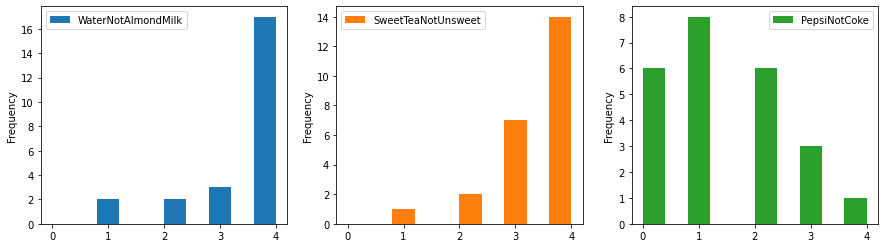

In [34]:
ax=data.plot.hist(subplots=True, legend=True, layout=(1, 3), figsize=(15,4))  #pandas plotting

I think maybe this will look better stacked and notice the plots are sorted by mean value since we changed the order of our columns previously.  

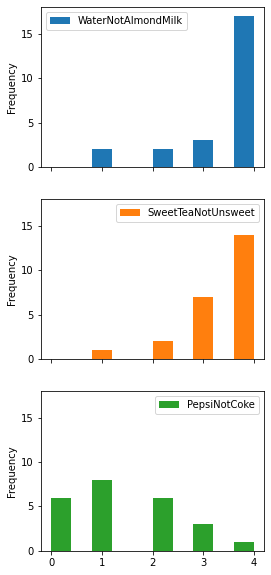

In [74]:
ax=data.plot.hist(subplots=True, legend=True, layout=(3, 1), figsize=(4,10), bins=10, ylim=[0,18])  #pandas plotting

We could also make a horizontal bar chart of our mean values: 

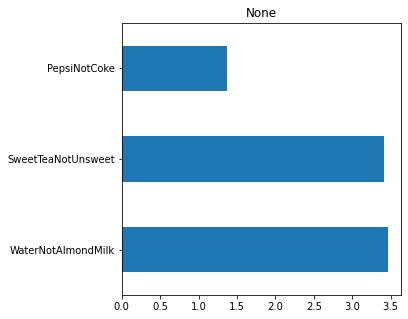

In [48]:
data_mean=data.mean()
ax=data_mean.plot(subplots=True,kind='barh',figsize=(5,5), stacked=True)

Another type of plot that can be useful is the box plot.  Here is the meaning of the box plot: 
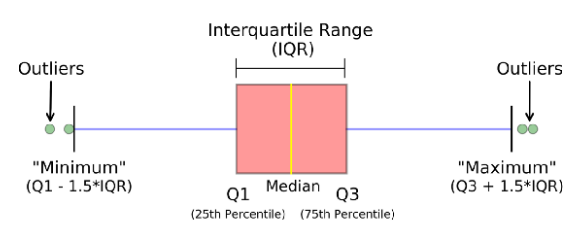

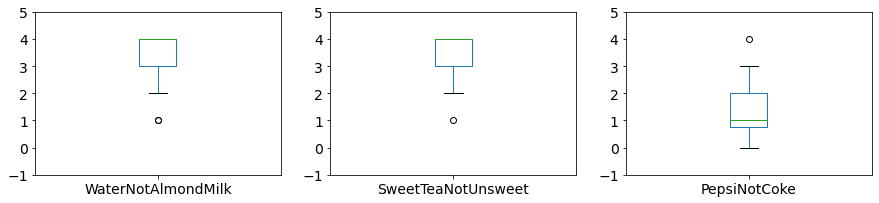

In [53]:
ax=data.plot(subplots=True,kind='box',figsize=(15,3), ylim=(-1,5), layout=(1,3), fontsize=14)

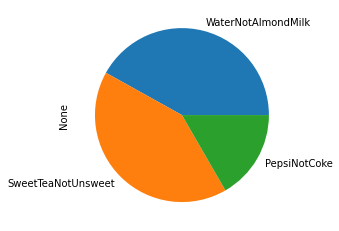

In [54]:
ax=data_mean.plot(kind='pie')

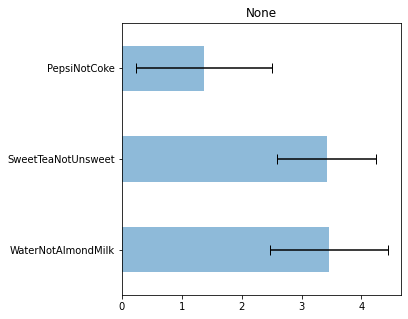

In [58]:
ax=data_mean.plot(alpha=0.5,subplots=True,kind='barh',figsize=(5,5), stacked=True, xerr=data.std(), capsize=5)

Let's use a paired t-test to see if the mean values for our data are significantly different from one another. We will use the standard p-value of <= 0.05 to conclude that the means are significantly different. 

Here we test whether the preference to drink Pepsi over Coke is significantly different than the preference to drink Water over Almond Milk.  

In [93]:
t,p=stats.ttest_rel(data.loc[:,'PepsiNotCoke'], data.loc[:,'WaterNotAlmondMilk'])
print(t)
print(p)

-7.229988054812213
2.3265784441680086e-07


Since our p value shown above (2.3e-7) is less than 0.05, we conclude that their is a significant difference in preference for drinking Pepsi over Coke as compared to drinking Water over Almond Milk.  In the example above, a mean of 2.0 would be no preference.  Based on the data the class has a preference for coke and a preference for water.  Now lets compare the mean of WaterNotAlmondMilk to the mean of SweatTeaNotUnsweet.  

In [61]:
t,p=stats.ttest_rel(data.loc[:,'SweetTeaNotUnsweet'], data.loc[:,'WaterNotAlmondMilk'])
print(t)
print(p)

-0.17052013832006116
0.8660922491049519


Since our p value above is greater than 0.05, we conclude that the mean of WaterNotAlmondMilk is statistically the same as the mean of SweetTeaNotUnsweet.  

Here are some khan videos on the t-test if you are interested but you will get more of this in Design of Experiments.  

https://www.khanacademy.org/math/ap-statistics/two-sample-inference/two-sample-t-test-means/v/alternative-hypothesis-for-2-sample-t-test

https://www.khanacademy.org/math/ap-statistics/two-sample-inference/two-sample-t-test-means/v/example-of-hypotheses-for-paired-and-2-sample-t-tests

https://www.khanacademy.org/math/ap-statistics/two-sample-inference/two-sample-t-test-means/e/hypotheses-two-sample-t-test-means

https://www.khanacademy.org/math/ap-statistics/two-sample-inference/two-sample-t-test-means/v/two-sample-t-test-for-difference-of-means

